<a href="https://colab.research.google.com/github/ilank-pro/SmartHotel360-Website/blob/master/Stock_Search2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np





In [41]:

# Step 1: Retrieve the list of Nasdaq-100 stocks
nasdaq_100_tickers = """
AAPL MSFT AMZN NVDA GOOG GOOGL META TSLA PEP ADBE NFLX CSCO AVGO TXN CMCSA COST INTU SBUX AMGN QCOM AMD BKNG GILD FISV ADP MU MDLZ LRCX ADI HON LLY AMAT ISRG PYPL NOW REGN PANW ORLY TMUS CHTR ABNB ILMN ZM SNPS MRVL FTNT KLAC DXCM NXPI VRTX MS DELL BIIB WDAY EA EXC SEDG MCHP PDD ASML IDXX KDP MAR WMT CDNS ALGN MRNA OKTA PTON DOCU TEAM ZS SPLK MDB DDOG SHOP CRSP NET U DKNG SQ PATH BILL ROKU TWLO RIVN CRWD
"""

# Convert the string of tickers into a list
tickers = nasdaq_100_tickers.split()

# Step 2: Fetch historical stock price data with error handling
valid_tickers = []
data_dict = {}
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2024-01-01", end="2024-05-18")
        if not data.empty and not data.Close.empty:
            valid_tickers.append(ticker)
            data_dict[ticker] = data

    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [42]:
# Function to detect breakout based on multiple indicators
def detect_breakouts(data, volume_threshold=1.5, ma_window=50, rsi_window=14, rsi_threshold=70):
    breakout_stocks = []
    for ticker, stock_data in data.items():
        stock_data['Volume_MA'] = stock_data['Volume'].rolling(window=ma_window).mean()
        stock_data['Close_MA'] = stock_data['Close'].rolling(window=ma_window).mean()
        stock_data['RSI'] = compute_rsi(stock_data['Close'], window=rsi_window)

        recent_data = stock_data.iloc[-3:]  # Last 3 days
        if all(recent_data['Close'] > recent_data['Close_MA']) and \
           all(recent_data['RSI'] > rsi_threshold) and \
           any(recent_data['Volume'] > volume_threshold * recent_data['Volume_MA']):
            breakout_stocks.append(ticker)
    return breakout_stocks

# Function to compute RSI
def compute_rsi(series, window):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Step 3: Calculate breakouts using multiple indicators
breakout_stocks = detect_breakouts(data_dict)
print (breakout_stocks)


['NFLX', 'DELL']


In [43]:
# Function to detect bullish engulfing pattern in the last 5 days
def detect_bullish_engulfing(data_dict, lookback_days=5):
    pattern = {}
    for ticker, data in data_dict.items():
        bullish_engulfing_dates = []
        if len(data) < lookback_days:
            continue
        recent_data = data.iloc[-lookback_days:]
        for i in range(1, len(recent_data)):
            prev_close = recent_data['Close'].iloc[i - 1]
            prev_open = recent_data['Open'].iloc[i - 1]
            curr_open = recent_data['Open'].iloc[i]
            curr_close = recent_data['Close'].iloc[i]

            if curr_open < prev_close and curr_close > prev_open:
                bullish_engulfing_dates.append(recent_data.index[i])

        if bullish_engulfing_dates:
            pattern[ticker] = bullish_engulfing_dates
    return pattern

bullish_engulfing = detect_bullish_engulfing(data_dict)
for ticker, dates in bullish_engulfing.items():
    print(f"\n{ticker}:")
    for date in dates:
        print(date)



MSFT:
2024-05-16 00:00:00

AMZN:
2024-05-15 00:00:00

NVDA:
2024-05-14 00:00:00

TSLA:
2024-05-17 00:00:00

PEP:
2024-05-17 00:00:00

ADBE:
2024-05-16 00:00:00

AVGO:
2024-05-14 00:00:00
2024-05-15 00:00:00
2024-05-16 00:00:00

TXN:
2024-05-14 00:00:00
2024-05-16 00:00:00

CMCSA:
2024-05-17 00:00:00

INTU:
2024-05-16 00:00:00

SBUX:
2024-05-17 00:00:00

AMD:
2024-05-14 00:00:00

GILD:
2024-05-17 00:00:00

ADP:
2024-05-16 00:00:00

MU:
2024-05-14 00:00:00

HON:
2024-05-16 00:00:00

LLY:
2024-05-14 00:00:00
2024-05-16 00:00:00

AMAT:
2024-05-14 00:00:00

ISRG:
2024-05-16 00:00:00
2024-05-17 00:00:00

PYPL:
2024-05-17 00:00:00

TMUS:
2024-05-17 00:00:00

ZM:
2024-05-17 00:00:00

FTNT:
2024-05-16 00:00:00
2024-05-17 00:00:00

KLAC:
2024-05-14 00:00:00

DXCM:
2024-05-17 00:00:00

VRTX:
2024-05-14 00:00:00
2024-05-16 00:00:00

DELL:
2024-05-14 00:00:00

BIIB:
2024-05-16 00:00:00

WDAY:
2024-05-16 00:00:00

ASML:
2024-05-16 00:00:00

IDXX:
2024-05-16 00:00:00

KDP:
2024-05-14 00:00:00

MAR:


In [44]:
# Function to detect Golden Cross patterns
def detect_golden_cross(data_dict, short_window=8, long_window=50, lookback_days=10):
    golden_crosses = {}
    for ticker, data in data_dict.items():
        data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
        data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

        # Filter data for the lookback period
        lookback_date = datetime.now() - timedelta(days=lookback_days)
        recent_data = data[data.index >= lookback_date]

        cross_dates = []
        for i in range(1, len(recent_data)):
            if recent_data['Short_MA'].iloc[i] > recent_data['Long_MA'].iloc[i] and recent_data['Short_MA'].iloc[i-1] <= recent_data['Long_MA'].iloc[i-1]:
                cross_dates.append(recent_data.index[i])

        if cross_dates:
            golden_crosses[ticker] = cross_dates
    return golden_crosses


golden_cross = detect_golden_cross(data_dict)
for ticker, dates in golden_cross.items():
    print(f"\n{ticker}:")
    for date in dates:
        print(date)


MSFT:
2024-05-15 00:00:00

NFLX:
2024-05-14 00:00:00

AVGO:
2024-05-14 00:00:00

INTU:
2024-05-15 00:00:00

FISV:
2024-05-15 00:00:00

ADP:
2024-05-15 00:00:00

HON:
2024-05-13 00:00:00

AMAT:
2024-05-13 00:00:00

ISRG:
2024-05-15 00:00:00

SNPS:
2024-05-16 00:00:00

MRVL:
2024-05-16 00:00:00

IDXX:
2024-05-17 00:00:00

WMT:
2024-05-13 00:00:00

PTON:
2024-05-13 00:00:00

MDB:
2024-05-16 00:00:00

DKNG:
2024-05-15 00:00:00

RIVN:
2024-05-14 00:00:00

CRWD:
2024-05-13 00:00:00


In [45]:
# Function to detect Bullish Flag patterns
def detect_bullish_flag(data_dict, uptrend_length=14, flag_length=7, flag_threshold=0.02):
    bullish_flags = {}
    for ticker, data in data_dict.items():
        bullish_flag_dates = []
        if len(data) < uptrend_length + flag_length:
            continue
        for i in range(uptrend_length + flag_length, len(data)):
            # Check for a strong uptrend
            uptrend = data['Close'].iloc[i-uptrend_length:i]
            uptrend_slope = np.polyfit(range(uptrend_length), uptrend, 1)[0]

            if uptrend_slope <= 0:
                continue

            # Check for flag pattern
            flag = data['Close'].iloc[i-flag_length:i]
            flag_slope = np.polyfit(range(flag_length), flag, 1)[0]

            if abs(flag_slope) > flag_threshold:
                continue

            # Check for breakout from the flag
            if data['Close'].iloc[i] > max(flag):
                bullish_flag_dates.append(data.index[i])

        if bullish_flag_dates:
            bullish_flags[ticker] = bullish_flag_dates
    return bullish_flags


bullish_flag = detect_bullish_flag(data_dict)
for ticker, dates in bullish_flag.items():
    print(f"\n{ticker}:")
    for date in dates:
        print(date)



PEP:
2024-05-07 00:00:00

QCOM:
2024-02-26 00:00:00

HON:
2024-05-03 00:00:00

FTNT:
2024-02-06 00:00:00

EXC:
2024-03-05 00:00:00
2024-04-09 00:00:00
2024-05-01 00:00:00
2024-05-02 00:00:00
2024-05-07 00:00:00
2024-05-09 00:00:00

MAR:
2024-03-12 00:00:00

WMT:
2024-02-20 00:00:00
2024-03-05 00:00:00
2024-03-06 00:00:00

CDNS:
2024-05-15 00:00:00

PTON:
2024-03-11 00:00:00
2024-05-03 00:00:00

DOCU:
2024-03-28 00:00:00

DKNG:
2024-05-15 00:00:00

PATH:
2024-05-15 00:00:00


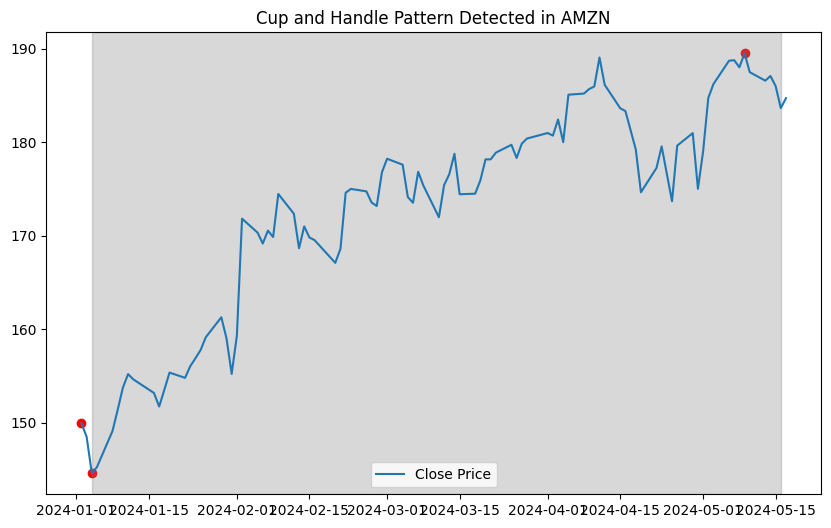

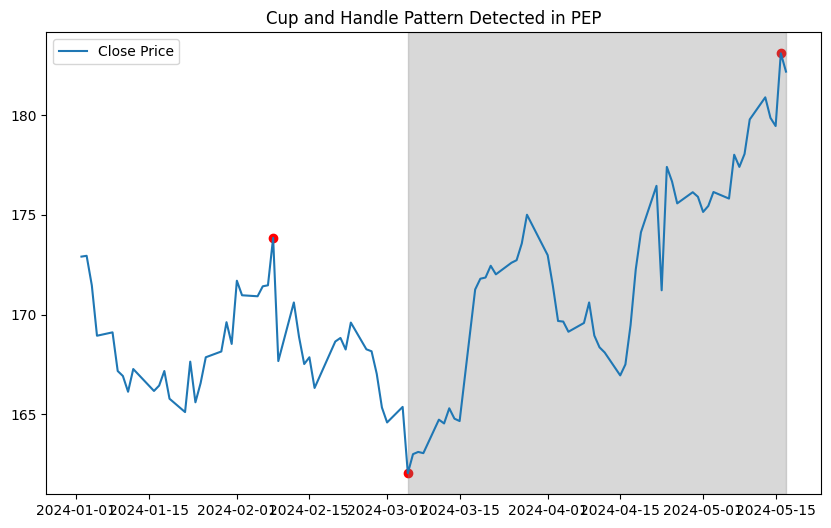

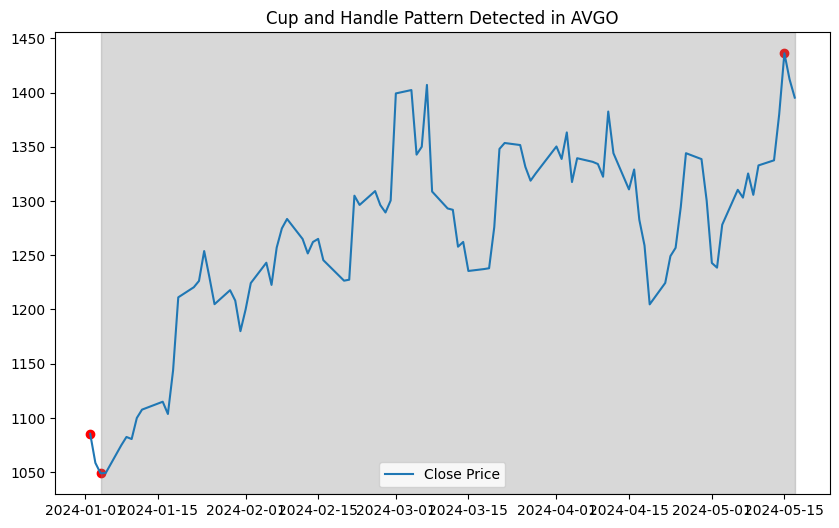

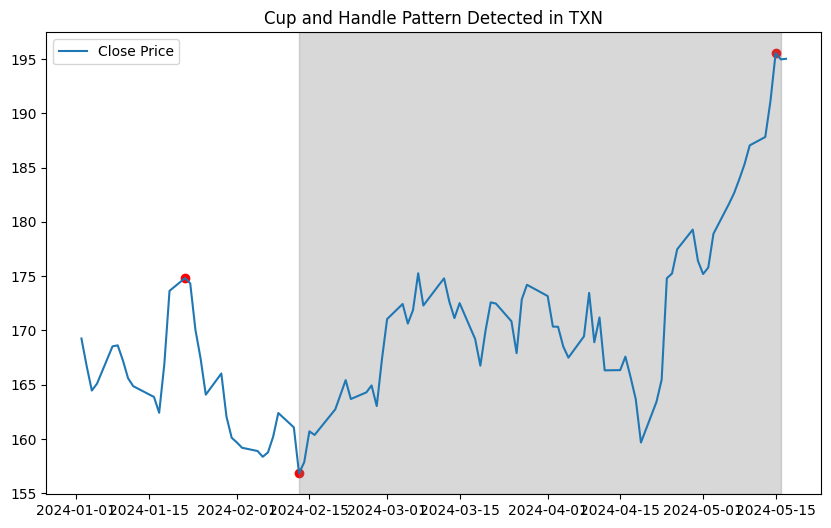

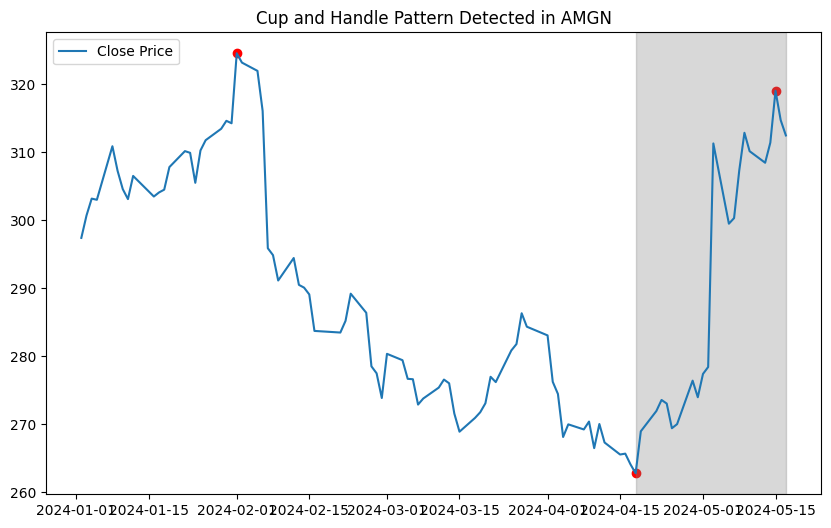

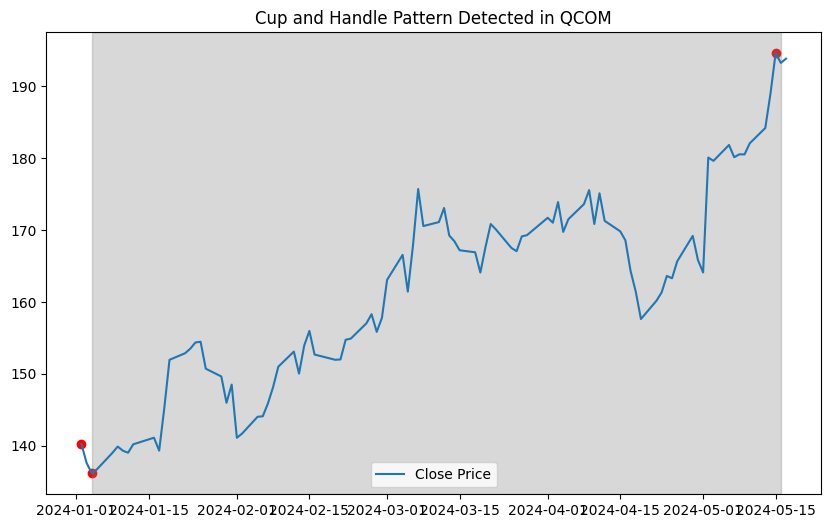

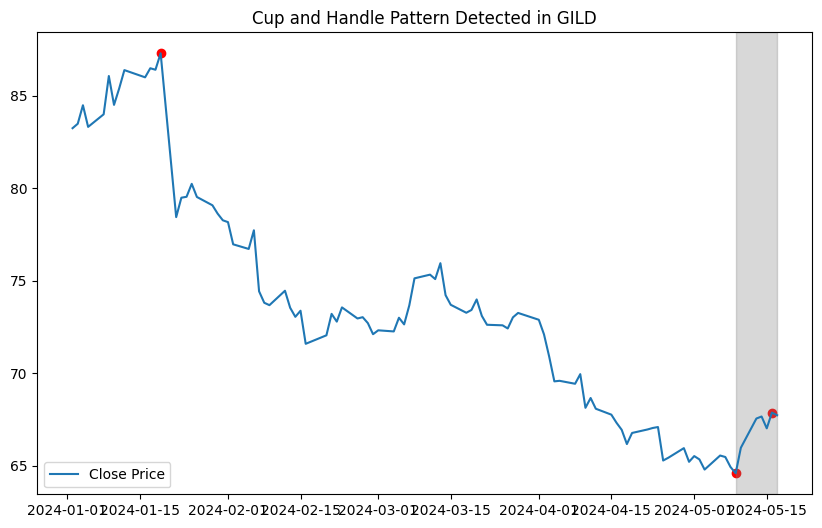

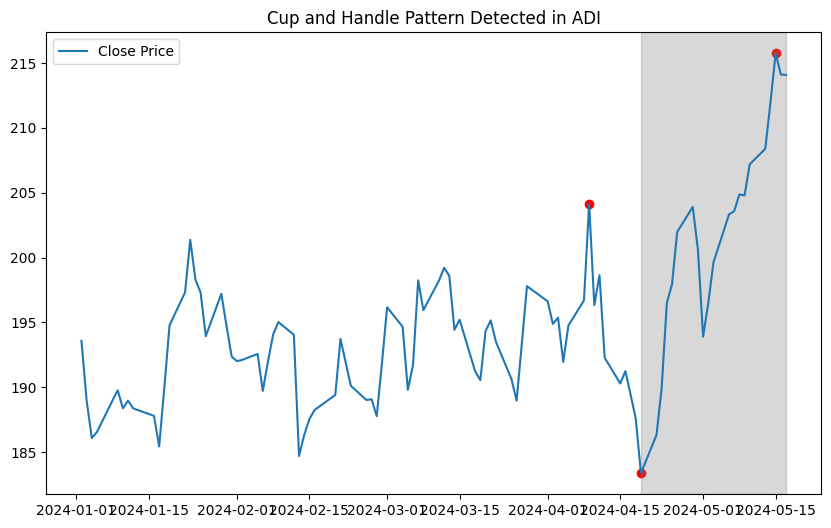

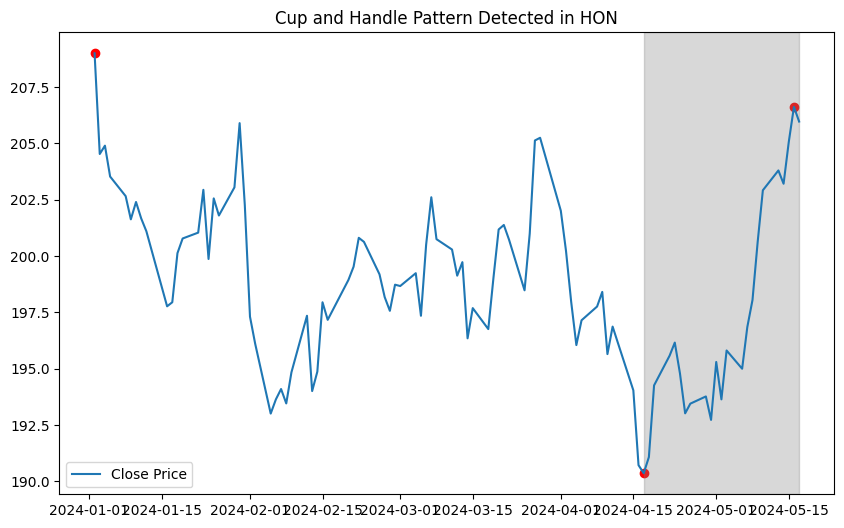

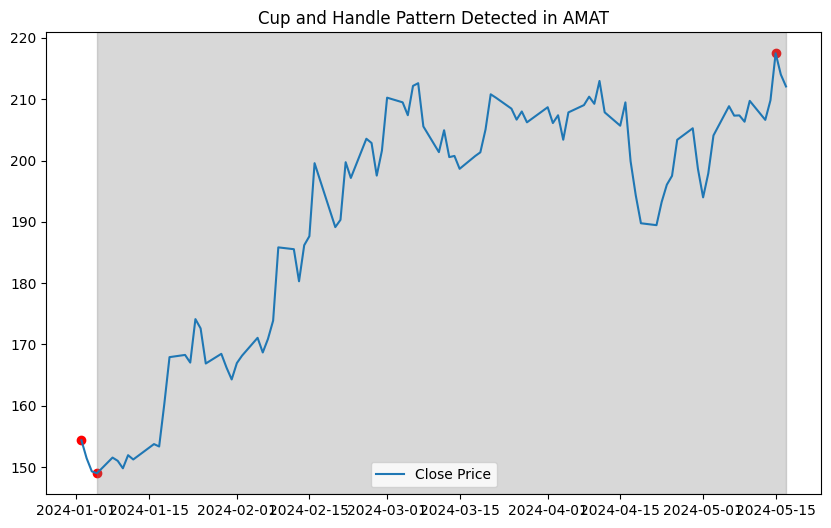

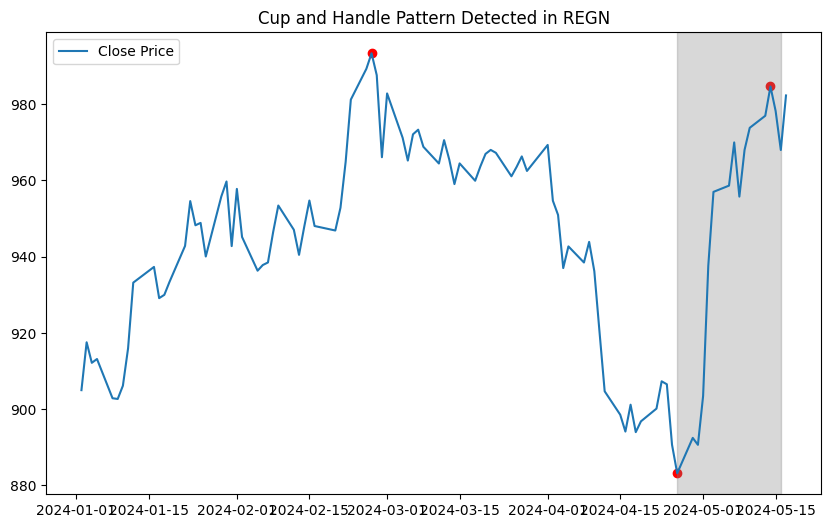

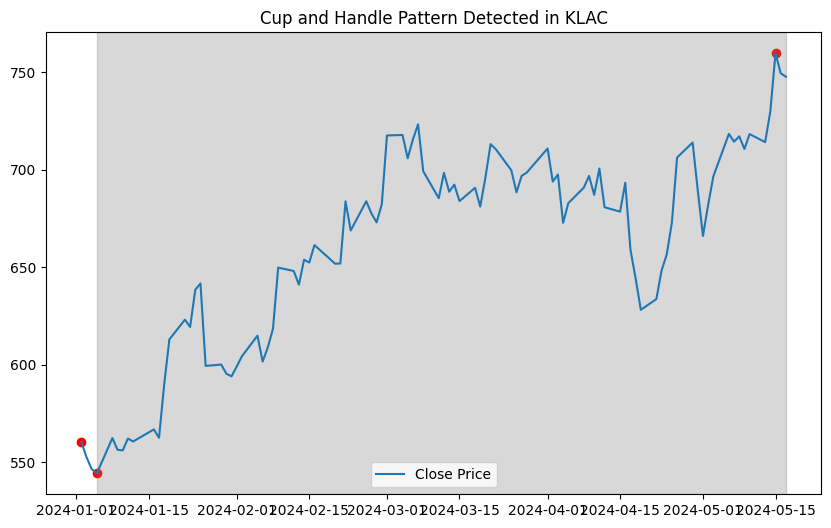

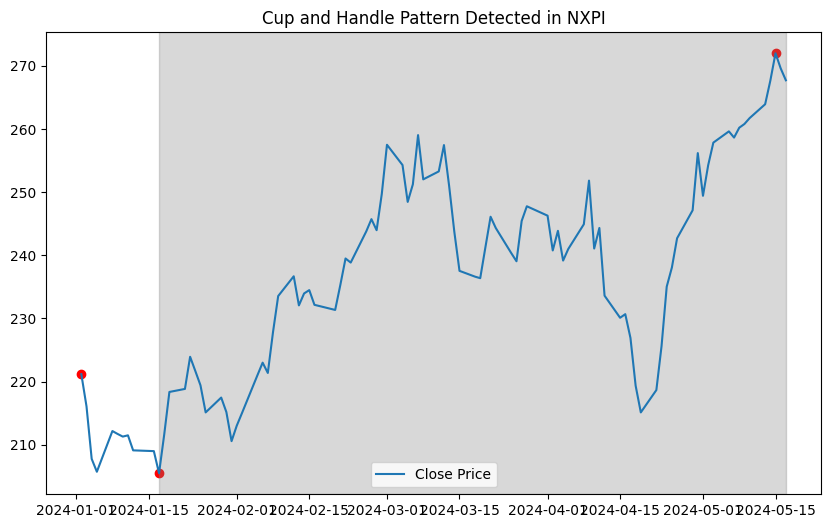

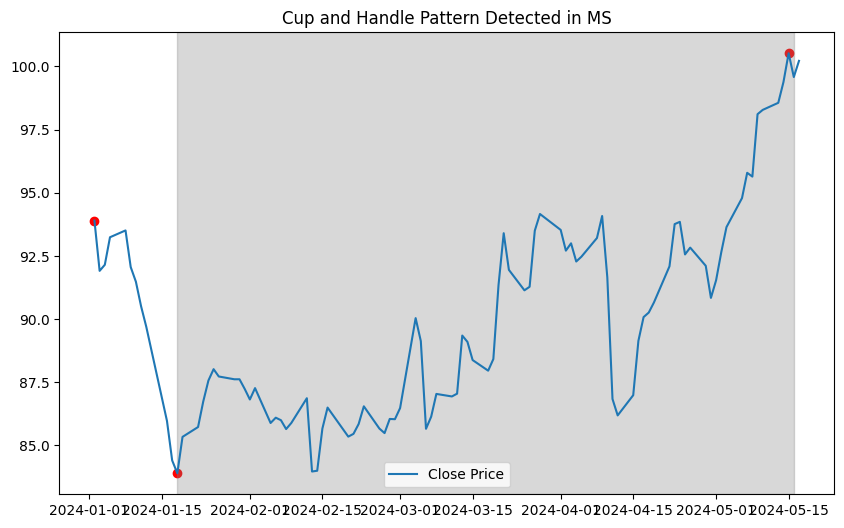

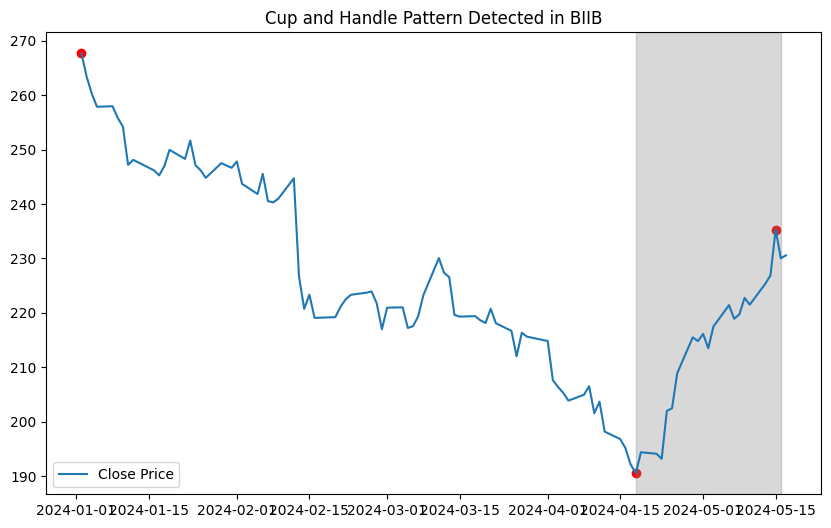

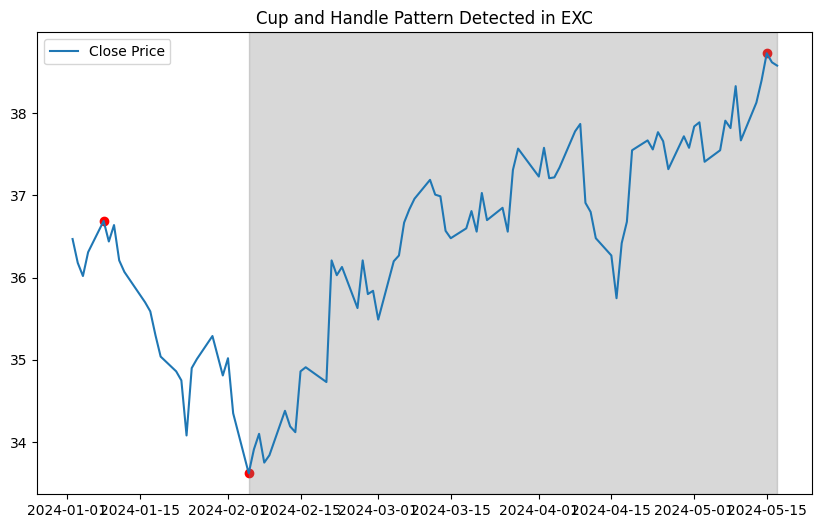

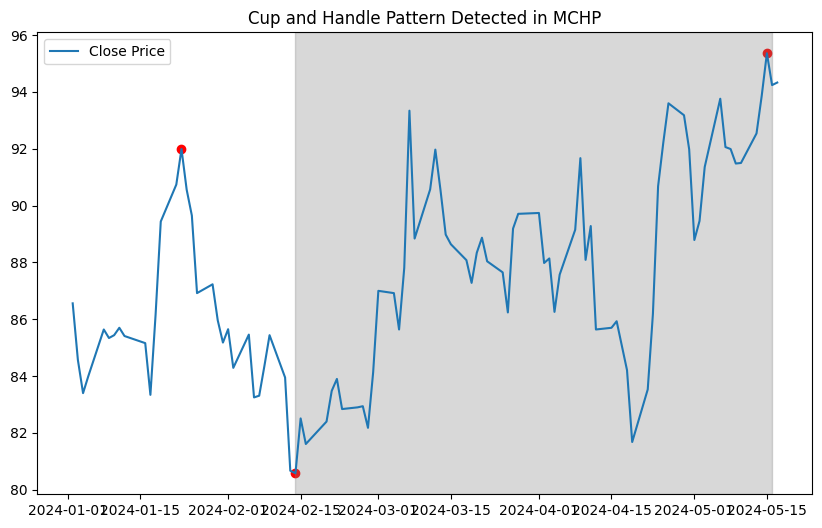

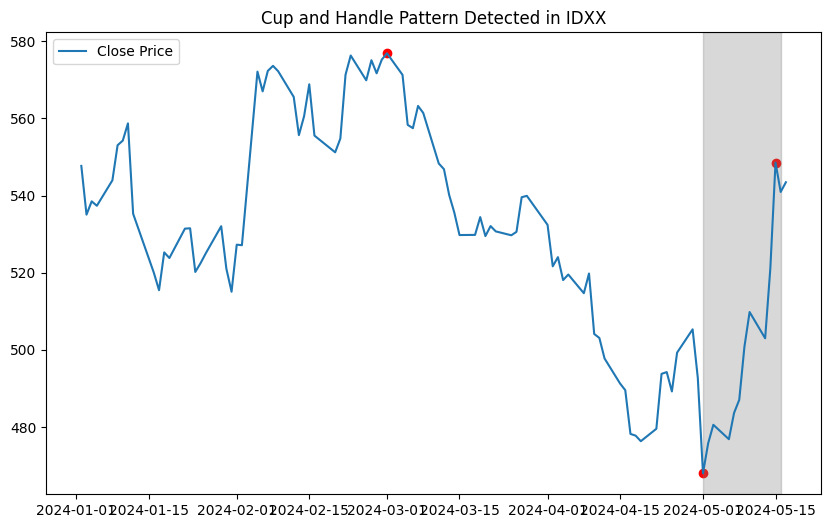

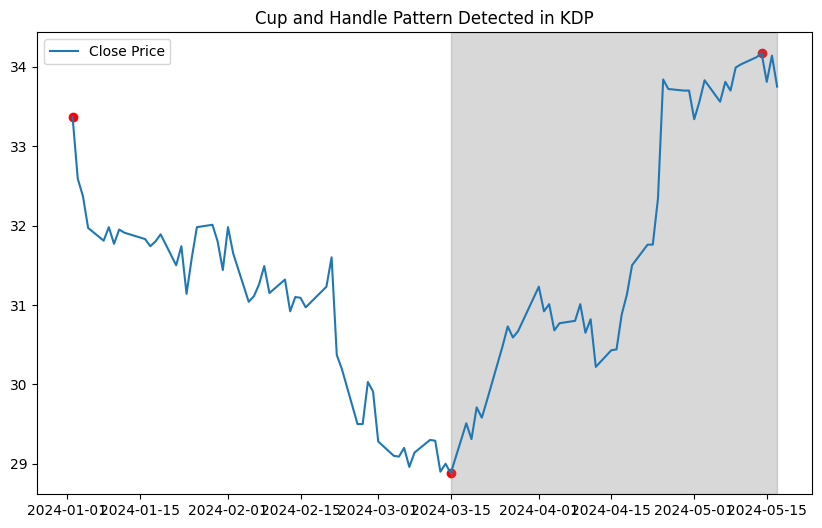

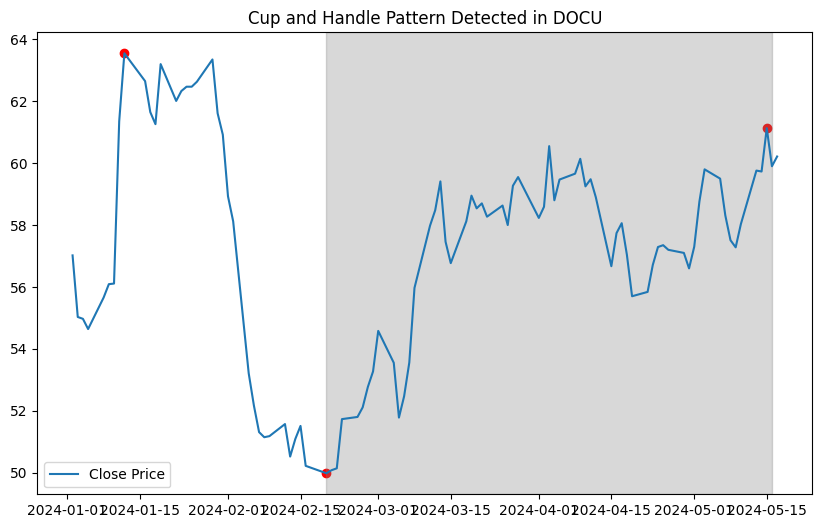

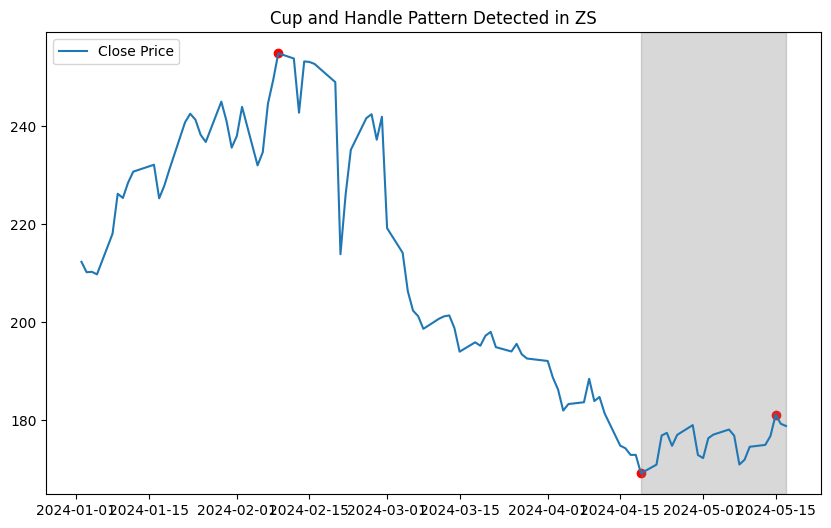

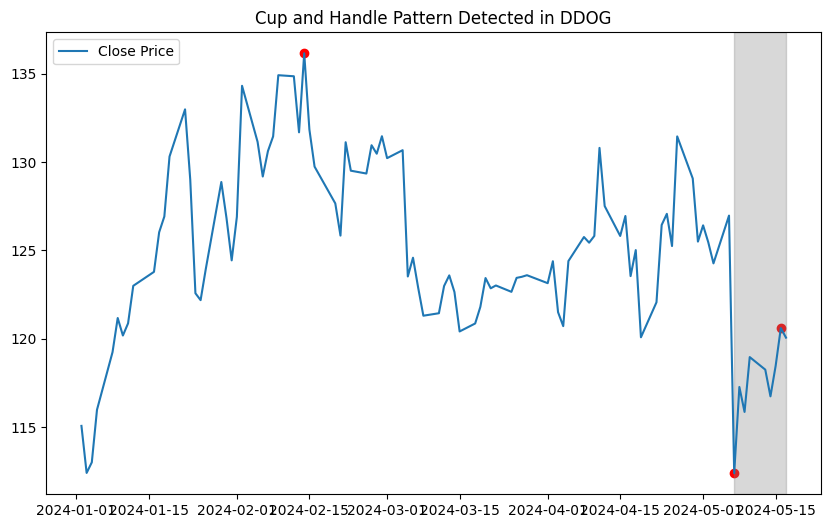

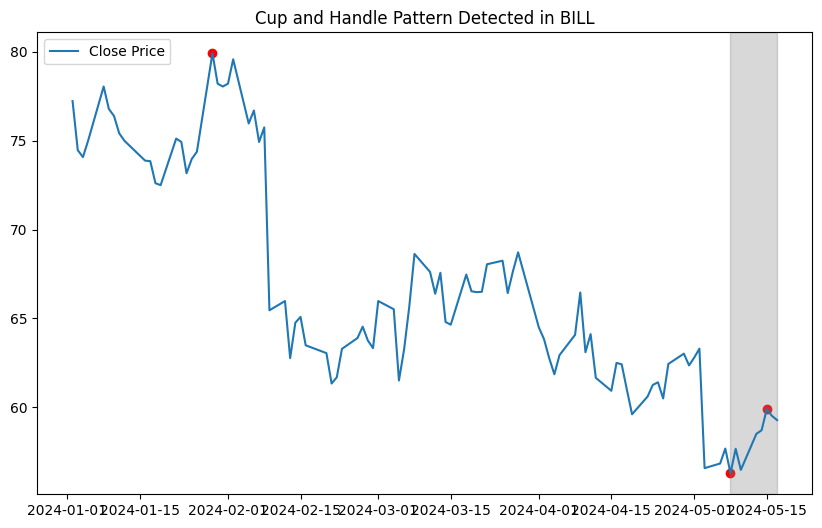

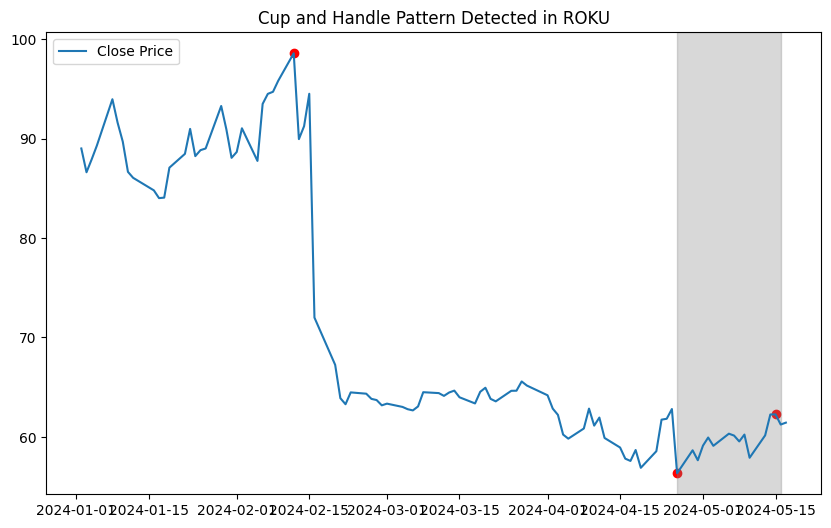

['AMZN', 'PEP', 'AVGO', 'TXN', 'AMGN', 'QCOM', 'GILD', 'ADI', 'HON', 'AMAT', 'REGN', 'KLAC', 'NXPI', 'MS', 'BIIB', 'EXC', 'MCHP', 'IDXX', 'KDP', 'DOCU', 'ZS', 'DDOG', 'BILL', 'ROKU']


In [46]:
# Function to detect the "cup and handle" pattern
def detect_cup_and_handle(data):
    cup_and_handle_stocks = []

    for ticker, df in data.items():
        if len(df) < 50:  # Ensure there's enough data
            continue

        # Identify the 'cup' part
        df['Min20'] = df['Close'].rolling(window=20, min_periods=1).min()
        df['Max20'] = df['Close'].rolling(window=20, min_periods=1).max()
        df['Avg20'] = df['Close'].rolling(window=20, min_periods=1).mean()

        # Find the local minimums and maximums to detect the cup
        min_idx = df['Min20'].idxmin()
        max_idx1 = df['Close'][:min_idx].idxmax()
        max_idx2 = df['Close'][min_idx:].idxmax()

        if max_idx1 < min_idx < max_idx2:
            # Ensure the handle formation
            handle_start = max_idx2
            handle_end = df['Close'][handle_start:].idxmin()

            if handle_end > handle_start:
                # Check if the handle is formed within 20% of the cup's height
                cup_height = df['Close'][max_idx2] - df['Close'][min_idx]
                handle_height = df['Close'][max_idx2] - df['Close'][handle_end]

                if handle_height < 0.2 * cup_height:
                    cup_and_handle_stocks.append(ticker)

                    # Plot the detected pattern
                    plt.figure(figsize=(10, 6))
                    plt.plot(df['Close'], label='Close Price')
                    plt.scatter([max_idx1, min_idx, max_idx2], [df['Close'][max_idx1], df['Close'][min_idx], df['Close'][max_idx2]], color='red')
                    plt.axvspan(min_idx, handle_end, color='gray', alpha=0.3)
                    plt.title(f'Cup and Handle Pattern Detected in {ticker}')
                    plt.legend()
                    plt.show()

    return cup_and_handle_stocks

# Step 3: Calculate breakouts using multiple indicators
cup_and_handle_stocks = detect_cup_and_handle(data_dict)
print (cup_and_handle_stocks)


In [47]:
# Function to plot candlestick charts with volume for a list of stocks
def plot_candlestick_with_volume(data_dict, stock_list, title='pattern_type'):
    three_months_ago = datetime.now() - timedelta(days=90)
    for ticker in stock_list:
        if ticker in data_dict:
            stock_data = data_dict[ticker][['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
            stock_data = stock_data[stock_data.index >= three_months_ago]

            fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02,
                                subplot_titles=(f'Candlestick Chart for {ticker}', 'Volume'),
                                row_width=[0.2, 0.7])

            fig.add_trace(go.Candlestick(
                x=stock_data.index,
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'],
                name=ticker
            ), row=1, col=1)

            fig.add_trace(go.Bar(
                x=stock_data.index,
                y=stock_data['Volume'],
                name='Volume',
                marker_color='blue'
            ), row=2, col=1)

            fig.update_layout(
                title=title, # f'Candlestick Chart for {ticker}',
                #xaxis_title='Date',
                yaxis_title='Price',
                xaxis2_title='Date',
                yaxis2_title='Volume',
                xaxis_rangeslider_visible=False,
                width=1200,  # Increase the width for bigger candles
                height=400,  # Increase the height for bigger candles
                margin=dict(l=20, r=20, t=40, b=20),
                font=dict(size=14)
            )

            fig.show()

In [48]:
# Plot the candlestick charts with volume for the selected breakout stocks
plot_candlestick_with_volume(data_dict, breakout_stocks, 'breakout_stocks')
plot_candlestick_with_volume(data_dict, cup_and_handle_stocks, 'cup_and_handle_stocks')

plot_candlestick_with_volume(data_dict, golden_cross, 'golden_cross')
plot_candlestick_with_volume(data_dict, bullish_engulfing, 'bullish_engulfing')
plot_candlestick_with_volume(data_dict, breakout_stocks, 'breakout_stocks')
plot_candlestick_with_volume(data_dict, bullish_flag, 'bullish_flag')

